## Time series tensor live-tutorials - Part 1.
Here you can learn the basic use of tensor in time series data.
If you want the picture shown outside this tutorial, uncomment following line.

In [1]:
# %matplotlib qt

Import necessary packages.

Remember to install spartan2 from pip or clone the project from github before doing this.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import spartan2.spartan as st

First, we load data from origin file by **loadTensor** function.

**name**: file name, support 'gz', 'tensor', 'csv' format.

**path**: support relative or absolute path of directory.

**col_idx**: id of chosen columns in data file.

**col_types**: data type of each chosen column.

**has_value**: if time column exists.

**value_idx**: time column id, default is 0.

In [3]:
data = st.loadTensor(name = "example_time", path = "inputData/", col_idx = [0, 1, 2], col_types = [float, float, float], hasvalue=True)

Info: Tensor is loaded
           ----------------------
             attr     |	2
             values   |	True
             nonzeros |	36000



This step, we transfer tensor into **STTimeSeries** object.

**attrlabels**: label name of each dimension.

**numsensors**: number of sensors you select as time series data. If not provided, all data will be used.

**freq**: frequency of the signal. If not provided, it will be calculated from time dimension.

**startts**: start timestamp. If not provided, it will be calculated from time dimension.

In [4]:
#todo: time ticks is not even, need resample
time_series = data.toTimeseries(attrlabels=['ecg_low', 'ecg_high'])
print(time_series)


            Time Series Object
            Dimension Size: 2
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high
        


Function **show** draws plot of data.

**chosen_labels** is a two-dimension array while the first dimension defines #subfigures and the second defines each line in subfigures.

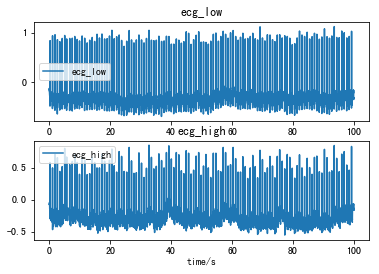

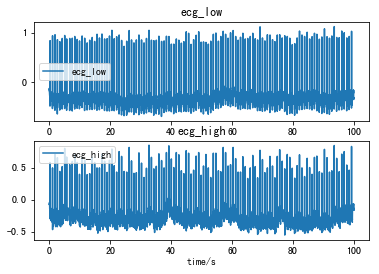

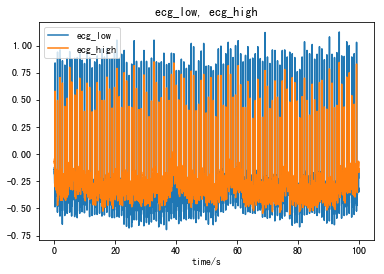

In [5]:
time_series.show()
time_series.show(chosen_labels=[['ecg_low'], ['ecg_high']])
time_series.show(chosen_labels=[time_series.attrlabels])

Function **resample** resamples series data with a new frequency.

**resampled_freq**: resampled frequency.

**show**: if True, show the resampled data by matplotlib.

**inplace**: if True, return a new STTimeseries object.

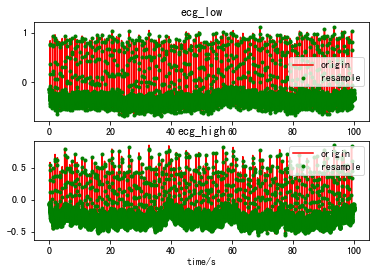


            Time Series Object
            Dimension Size: 2
            Length: 18000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 180
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high
        


In [6]:
resampled_time_series = time_series.resample(180, show=True)
print(resampled_time_series)

In [7]:
resampled_time_series.resample(360, inplace=True)
print(resampled_time_series)


            Time Series Object
            Dimension Size: 2
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high
        


Function **add_columns** adds columns to STTimeseries object.

**column_names**: list of column names.

**values**: values of columns.
    if one-dimension list, new column will be single value; 
    if two-dimension list, new column will be a list

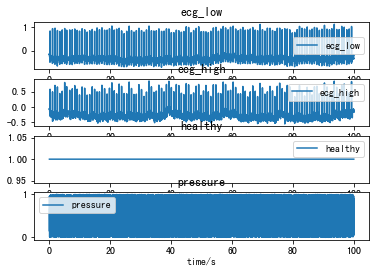


            Time Series Object
            Dimension Size: 4
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high, healthy, pressure
        


In [8]:
added_series = time_series.add_columns(['healthy', 'pressure'], [1, np.random.rand(time_series.length)], inplace=False, show=True)
print(added_series)

Function **combine** combines series data which have the same frequency.

**series**: A single or a list of STTimeseries object to be combined.

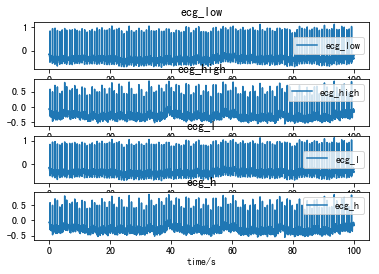


            Time Series Object
            Dimension Size: 4
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high, ecg_l, ecg_h
        


In [9]:
combined_series = data.toTimeseries(attrlabels=['ecg_l', 'ecg_h'])
combined_series = time_series.combine(combined_series, inplace=False, show=True)
print(combined_series)

In [10]:
combined_series.combine([combined_series, combined_series], inplace=True)
print(combined_series)


            Time Series Object
            Dimension Size: 12
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high, ecg_l, ecg_h, ecg_low_1, ecg_high_1, ecg_l_1, ecg_h_1, ecg_low_2, ecg_high_2, ecg_l_2, ecg_h_2
        


Function **extract** removes chosen attribute columns from STTimeseries object.

**attrs**: names of chosen dimensions to be extracted.

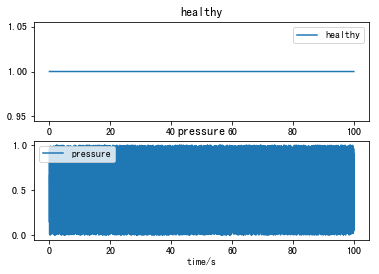


            Time Series Object
            Dimension Size: 2
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: healthy, pressure
        


In [11]:
extracted_series = added_series.extract(['healthy', 'pressure'], show=True, inplace=False)
print(extracted_series)

Function **concat** cooncats series data which have the same dimension size.

**series**: A single or a list of STTimeseries object to be concatted.

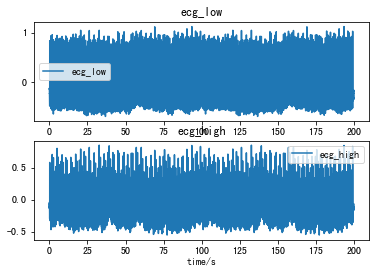


            Time Series Object
            Dimension Size: 2
            Length: 72000
            Time Length: 200.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high
        


In [12]:
concatted_series = time_series.concat(time_series, inplace=False, show=True)
print(concatted_series)

In [13]:
concatted_series.concat([time_series, time_series], inplace=True, show=False)
print(concatted_series)


            Time Series Object
            Dimension Size: 2
            Length: 144000
            Time Length: 400.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low, ecg_high
        


Function **cut** cuts timestamps of chosen attribute columns.

**attrs**: names of columns to be cut. If not provided, all columns will be cut.

**start**: start position of cut. If not provided, cut from the very front position.

**end**: end position of cut. If not provided, cut to the very last position.

**form**: default is "point", type of start and end. If "point", start and end would mean absolute positions. If "time", start and end would mean timestamp and need to multiply frequency to get the absolute positions.

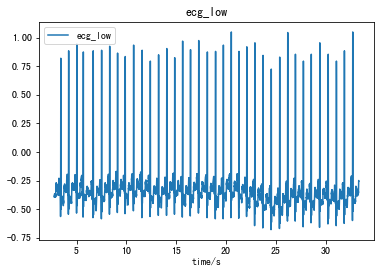


            Time Series Object
            Dimension Size: 1
            Length: 11000
            Time Length: 30.56
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 2.778
            Labels: ecg_low
        


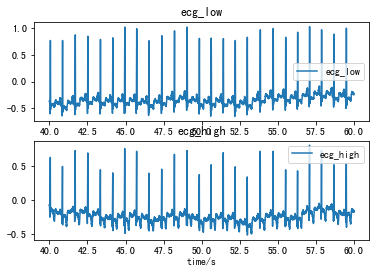


            Time Series Object
            Dimension Size: 2
            Length: 7200
            Time Length: 20.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 40.0
            Labels: ecg_low, ecg_high
        


In [14]:
cut_point_series = time_series.cut(attrs=['ecg_low'], start=1000, end=12000, show=True, inplace=False)
print(cut_point_series)
cut_time_series = time_series.cut(start=40, end=60, form='time', show=True, inplace=False)
print(cut_time_series)

Function **normalize** normalizes attributes by different strategies.

**attrs**: names of columns to be normalized. If not provided, all columns will be normalized.

**start**: strategy: normalize strategy.

- minmax: normalize by minmax strategy to [-1, 1].

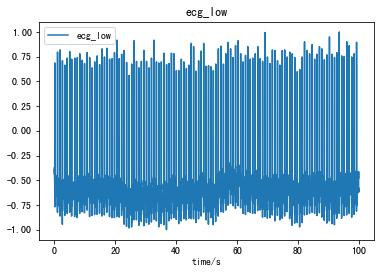


            Time Series Object
            Dimension Size: 1
            Length: 36000
            Time Length: 100.00
            Origin Time Dimension: True
            Frequency: 360
            Start Timestamp: 0.0
            Labels: ecg_low
        


In [15]:
normalized_series = time_series.normalize(attrs=['ecg_low'], show=True, inplace=False)
print(normalized_series)

Function **savefile** saves current time series object as a tensor file, time column [if exists] shall always be stored as the first column.

**name**: name of the file to be saved.

**path**: default is None, saved to parent directory.

**attr**: default is None. If assigned, only save required columns.

**annotation**: annotations which will be saved at the first line of the file.

**savetime**: default is True, save time dimension.

**format**: support 'tensor', 'csv' format.

In [16]:
time_series.savefile('test_tensor', path='.//inputData//', attrs=['ecg_low'], annotation='this is a test', format='tensor')
time_series.savefile('test_csv', path='.//inputData//', attrs=['ecg_low'], annotation='this is a test', format='csv')